---

# The importance of randomness: Jensen's Inequality

--- 


by Marco Corradini

---

<p style="line-height:2.0">
<br>

In quantitative finance, "randomness" plays a key role. <br>
We treat financial quantities, such as stock prices or interest rates, as random and then we choose a model for describing that randomness. <br> 
The reason why we need a good model for randomness is quickly explained by the **Jensen's Inequality**.

Let's start with an example:<br><br>
- Stock price today: $100.<br>
- In one year's time the stock price could be $50 or $150, both the outcomes are equally likely (each with a probability of 50%).<br><br>

**How can we value an european call option on this stock, with strike $100 and expiring in 1 year??**
<br>

$ \quad \text{Payoff}_{\text{call}}(\text{Stock Price}_{\text{T}}) = \max(\text{Stock Price}_{\text{T}} - \text{Strike}, 0)$ <br><br>

Well, there are two ways that come to mind.<br><br>

1. **Calculate the call payoff of the expected stock price:** <br> <br>
$ \quad \text{Expected Stock Price} = \dfrac{50 + 150}{2} = 100.$ <br><br>
$ \quad \text{Payoff(Expexted Stock Price)} = \max(100 - 100, 0) = 0.$ <br><br>
Zero...uhm...<br>
Could this be the way to value the call? <br>
Probably not: it is unlikely that someone hands you this option for free, since half the time there is some positive payoff. <br><br>

2. **Calculate the call payoff in each scenario and then take the expectation:**<br> <br>
$ \quad \text{Payoff}(\text{Stock Price}_{\text{T}}=50) = \max(50 - 100, 0) = 0.$ <br><br>
$ \quad \text{Payoff}(\text{Stock Price}_{\text{T}}=150) = \max(150 - 100, 0) = 50.$ <br><br>
$ \quad \text{Expected}[\text{Payoff}(\text{Stock Price}_{\text{T}})] = 0.5 \times 0 + 0.5 \times 50 = 25.$ <br><br>
By taking the present value of $25 we obtain something that is still not accurate, but that is *closer* to the real value of the option. <br>

But wait... in the second calculation **the expected stock price is still $100** in one year. How's it possible??<br><br>

This discrepancy is explained by **Jensen’s Inequality**, which states that **for a convex function** $f$:<br><br>
$ \quad  \boldsymbol{\mathbb{E}[f(S)] \geq f(\mathbb{E}[S])}$ <br><br>

where: <br>
- $S$ is a random variable representing our stock price;<br>
- $f(S)$ is the payoff function of the call as a function of the random variable S. <br>

In our case, the call option’s payoff function $f(S) = \max(S - 100, 0)$ is convex. <br>This means that computing the expectation *after* applying the convex function (calculating the payoff in each scenario) yields a higher result than applying the function to the expected stock price. <br>

By applying a **Taylor series** expansion around the mean of $S$, we can get a rough idea of this difference. <br>

We write $ \text{ } S = \mathbb{E}[S] + \text{noise}= \mathbb{E}[S] + \epsilon, \text{ with } \mathbb{E}[\epsilon] = 0$, to separate the average behavior of $S$ from its random fluctuations $\epsilon$ around the mean.<br> Therefore S can be seen just as a deviation $\epsilon$ around its mean. <br>

Expanding $f(S)$ around $\mathbb{E}[S]$ gives:<br><br>

$ \quad f(S) = f(\mathbb{E}[S] + \epsilon) = f(\mathbb{E}[S]) + \epsilon f'(\mathbb{E}[S]) + \frac{1}{2}\epsilon^2 f''(\mathbb{E}[S]) + \cdots$<br><br>

Taking the expectation:<br><br>

$ \quad \mathbb{E}[f(S)] = \mathbb{E}[f(\mathbb{E}[S]) + \epsilon f'(\mathbb{E}[S]) + \frac{1}{2}\epsilon^2 f''(\mathbb{E}[S]) + \cdots]\approx f(\mathbb{E}[S]) + \dfrac{1}{2}f''(\mathbb{E}[S]) \mathbb{E}[\epsilon^2]$.<br><br>

Therefore, the left-hand side of the Jensens's Inequality is greater than the right by approximatly $\boldsymbol{\text{ } \dfrac{1}{2}f''(\mathbb{E}[S]) \mathbb{E}[\epsilon^2] \text{ }}$; this extra term captures the value added by the randomness: <br>
- the **convexity** $ f''(\mathbb{E}[S])$ of the option instrument.<br>
- the **variance** $\mathbb{E}[\epsilon^2]$ in the stock price.

The **intuition** is that:<br>
- If there is no randomness in the underlying stock price, $Var(S)= \mathbb{E}[\epsilon^2] =0$, then every outcome is exactly $\mathbb{E}[S]$, so the payoff of the call would be $f(\mathbb{E}[S])$.<br>
- the greater the convexity of the option's payoff, the greater the option's value; when you have a higher curvature (i.e., a larger second derivative) in the payoff function, increases in volatility lead to a disproportionately larger expected payoff.

Understanding this concept is crucial for what follows and for appreciating the importance of using realistic models of randomness (volatility).

</p>

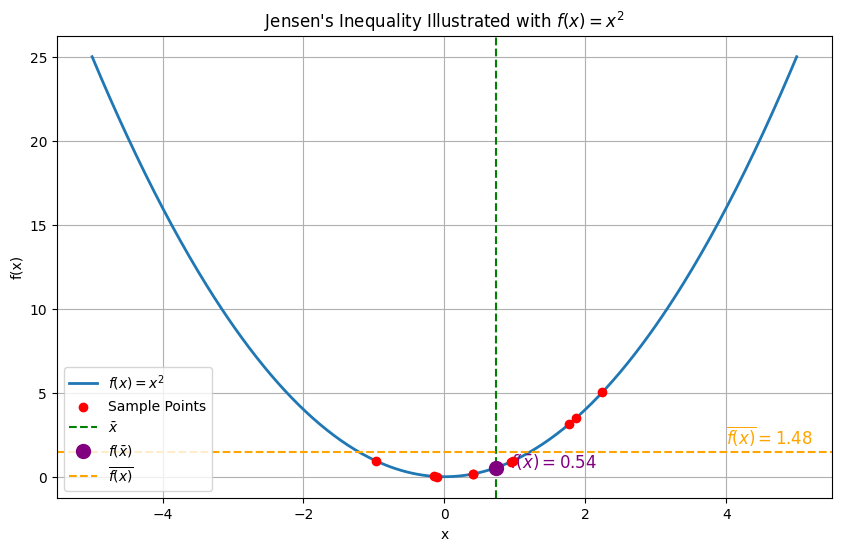

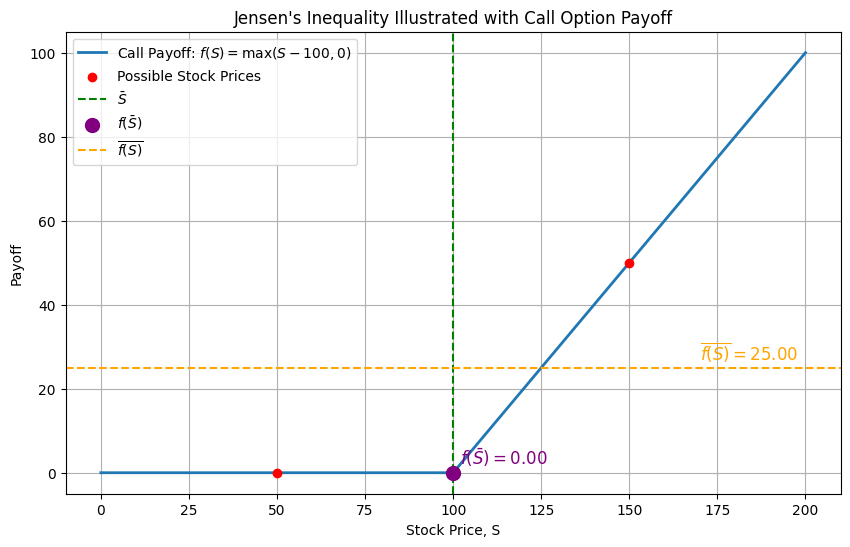

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Chart 1: Jensen's Inequality with f(x) = x^2
# -------------------------------

# Define a convex function: f(x) = x^2
def f(x):
    return x**2

# Create a domain for plotting the function
x_vals = np.linspace(-5, 5, 400)
y_vals = f(x_vals)

# Sample some random points from a normal distribution
np.random.seed(0)  # for reproducibility
x_sample = np.random.normal(0, 1, 10)
y_sample = f(x_sample)

# Compute the average of the sampled x values and corresponding function values
mean_x = np.mean(x_sample)
f_mean_x = f(mean_x)
mean_f = np.mean(y_sample)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r'$f(x)=x^2$', lw=2)
plt.scatter(x_sample, y_sample, color='red', zorder=5, label='Sample Points')
plt.axvline(x=mean_x, color='green', linestyle='--', lw=1.5, label=r'$\bar{x}$')
plt.scatter(mean_x, f_mean_x, color='purple', s=100, zorder=10, label=r'$f(\bar{x})$')
plt.axhline(y=mean_f, color='orange', linestyle='--', lw=1.5, label=r'$\overline{f(x)}$')

# Annotate the plot
plt.text(mean_x + 0.2, f_mean_x, f'$f(\\bar{{x}})={f_mean_x:.2f}$', color='purple', fontsize=12)
plt.text(x_vals[-1]-1, mean_f+0.5, f'$\overline{{f(x)}}={mean_f:.2f}$', color='orange', fontsize=12)

plt.title("Jensen's Inequality Illustrated with $f(x)=x^2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Chart 2: Jensen's Inequality with Call Option Payoff
# -------------------------------

# Define the call option payoff function: f(S) = max(S - K, 0)
def call_payoff(S, K=100):
    return np.maximum(S - K, 0)

# Define a range of stock prices for plotting
S_range = np.linspace(0, 200, 400)
payoff_vals = call_payoff(S_range, K=100)

# For our example, suppose the stock can be either 50 or 150 with equal probability.
S_possible = np.array([50, 150])
payoffs_possible = call_payoff(S_possible, K=100)

# Compute the expected stock price and the corresponding values
mean_S = np.mean(S_possible)          # (50 + 150) / 2 = 100
f_mean_S = call_payoff(mean_S, K=100)   # f(100) = max(100 - 100, 0) = 0
mean_payoff = np.mean(payoffs_possible) # (0 + 50) / 2 = 25

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(S_range, payoff_vals, label=r'Call Payoff: $f(S)=\max(S-100,0)$', lw=2)
plt.scatter(S_possible, payoffs_possible, color='red', zorder=5, label='Possible Stock Prices')
plt.axvline(x=mean_S, color='green', linestyle='--', lw=1.5, label=r'$\bar{S}$')
plt.scatter(mean_S, f_mean_S, color='purple', s=100, zorder=10, label=r'$f(\bar{S})$')
plt.axhline(y=mean_payoff, color='orange', linestyle='--', lw=1.5, label=r'$\overline{f(S)}$')

# Annotate the plot
plt.text(mean_S + 2, f_mean_S + 2, f'$f(\\bar{{S}})={f_mean_S:.2f}$', color='purple', fontsize=12)
plt.text(S_range[-1]-30, mean_payoff+2, f'$\overline{{f(S)}}={mean_payoff:.2f}$', color='orange', fontsize=12)

plt.title("Jensen's Inequality Illustrated with Call Option Payoff")
plt.xlabel("Stock Price, S")
plt.ylabel("Payoff")
plt.legend()
plt.grid(True)
plt.show()
